# CREATING DATE DIMENSION FOR POWER BI

#### A Date Dimension Table can be very helpful for different aspect while working on a Power BI project. It helps to generate dynamic slicing, filtering, drilling through date hierarchy and more functionality. 

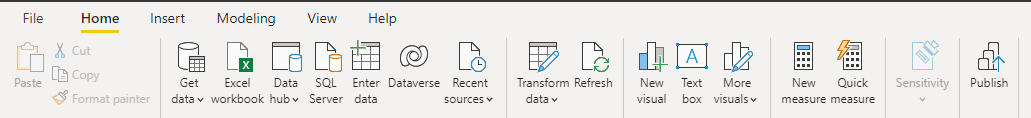
- Launch Power Query Editor

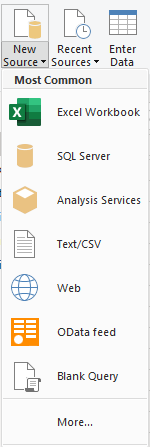
- Select From Other Sources > Blank Query.

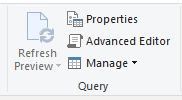
- Select Advanced Editor in either the Home or View tab of the editor.

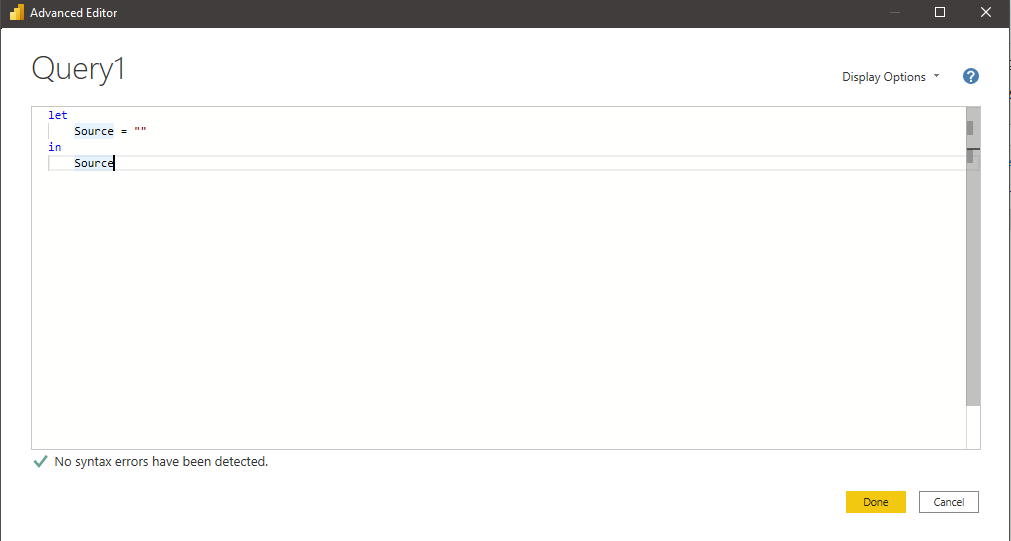
- Remove existing code that currently in the editor and replace it with this code:

In [ ]:
//Create Date Dimension
(StartDate as date, EndDate as date)=>

let
    //Capture the date range from the parameters
    StartDate = #date(Date.Year(StartDate), Date.Month(StartDate), 
    Date.Day(StartDate)),
    EndDate = #date(Date.Year(EndDate), Date.Month(EndDate), 
    Date.Day(EndDate)),

    //Get the number of dates that will be required for the table
    GetDateCount = Duration.Days(EndDate - StartDate),

    //Take the count of dates and turn it into a list of dates
    GetDateList = List.Dates(StartDate, GetDateCount, 
    #duration(1,0,0,0)),

    //Convert the list into a table
    DateListToTable = Table.FromList(GetDateList, 
    Splitter.SplitByNothing(), {"Date"}, null, ExtraValues.Error),

    //Create various date attributes from the date column
    //Add Year Column
    YearNumber = Table.AddColumn(DateListToTable, "Year", 
    each Date.Year([Date])),

    //Add Quarter Column
    QuarterNumber = Table.AddColumn(YearNumber , "Quarter", 
    each "Q" & Number.ToText(Date.QuarterOfYear([Date]))),

    //Add Week Number Column
    WeekNumber= Table.AddColumn(QuarterNumber , "Week Number", 
    each Date.WeekOfYear([Date])),

    //Add Month Number Column
    MonthNumber = Table.AddColumn(WeekNumber, "Month Number", 
    each Date.Month([Date])),

    //Add Month Name Column
    MonthName = Table.AddColumn(MonthNumber , "Month", 
    each Date.ToText([Date],"MMMM")),

    //Add Day of Week Column
    DayOfWeek = Table.AddColumn(MonthName , "Day of Week", 
    each Date.ToText([Date],"dddd"))

in
    DayOfWeek 


- Now a Funtion will Pop-up on Queries Window

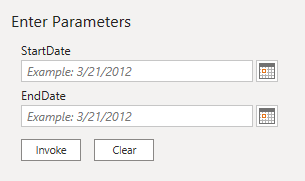
- Enter the Start date and End date, same as your fact table's Date column
- Click INVOKE

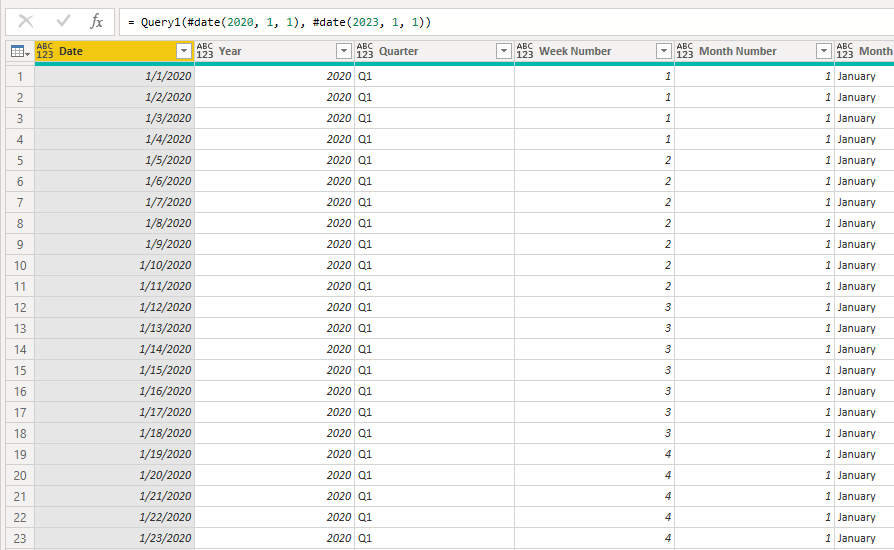
- Now you'll have a Date Dimensional Table with Date, Year, Quarter, Week Number, Month Number, Month, Day of Week.